MemTotal:       13289424 kB
MemFree:         4977860 kB
MemAvailable:    9641136 kB
Buffers:          152624 kB
Cached:          4683912 kB
SwapCached:            0 kB
Active:          1100228 kB
Inactive:        6790680 kB
Active(anon):       1424 kB
Inactive(anon):  3054920 kB
Active(file):    1098804 kB
Inactive(file):  3735760 kB
Unevictable:          36 kB
Mlocked:              36 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               180 kB
Writeback:             0 kB
AnonPages:       3038076 kB
Mapped:           998200 kB
Python version: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
Torch version: 2.6.0+cu124
=== AST AUDIO CLASSIFICATION TRAINING ===
Loading data from Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive connected successfully!
Data found in Drive: /content/drive/MyDrive/MakineOgrenmesiProjesi/Veri_Kumesi
Data copied successfully!

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ASTForAudioClassification were not initialized from the model checkpoint at MIT/ast-finetuned-audioset-10-10-0.4593 and are newly initialized because the shapes did not match:
- classifier.dense.bias: found shape torch.Size([527]) in the checkpoint and torch.Size([5]) in the model instantiated
- classifier.dense.weight: found shape torch.Size([527, 768]) in the checkpoint and torch.Size([5, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Device used: cuda
Loading data...
Total data count: 250
Total 250 samples loaded
  astim: 50 samples
  bronşit: 50 samples
  krup: 50 samples
  normal: 50 samples
  zatüre: 50 samples
Train: 175, Val: 37, Test: 38

Creating model...
Total parameters: 86,192,645
Trainable parameters: 86,192,645


Epoch 1/5 - Training:   0%|          | 0/88 [00:00<?, ?it/s]

Epoch 1/5 - Validation:   0%|          | 0/19 [00:00<?, ?it/s]

Epoch 1/5: Train Loss: 0.7630, Train Acc: 74.86%, Val Loss: 0.4485, Val Acc: 86.49%
  New best model saved! (Val Acc: 86.49%)


Epoch 2/5 - Training:   0%|          | 0/88 [00:00<?, ?it/s]

Epoch 2/5 - Validation:   0%|          | 0/19 [00:00<?, ?it/s]

Epoch 2/5: Train Loss: 0.5385, Train Acc: 80.57%, Val Loss: 0.5514, Val Acc: 83.78%


Epoch 3/5 - Training:   0%|          | 0/88 [00:00<?, ?it/s]

Epoch 3/5 - Validation:   0%|          | 0/19 [00:00<?, ?it/s]

Epoch 3/5: Train Loss: 0.2725, Train Acc: 92.00%, Val Loss: 0.6809, Val Acc: 78.38%


Epoch 4/5 - Training:   0%|          | 0/88 [00:00<?, ?it/s]

Epoch 4/5 - Validation:   0%|          | 0/19 [00:00<?, ?it/s]

Epoch 4/5: Train Loss: 0.2822, Train Acc: 90.29%, Val Loss: 0.3731, Val Acc: 91.89%
  New best model saved! (Val Acc: 91.89%)


Epoch 5/5 - Training:   0%|          | 0/88 [00:00<?, ?it/s]

Epoch 5/5 - Validation:   0%|          | 0/19 [00:00<?, ?it/s]

Epoch 5/5: Train Loss: 0.1304, Train Acc: 96.57%, Val Loss: 0.7864, Val Acc: 81.08%

Training time: 5.16 minutes

--- Final Training Metrics ---
Final Train Loss: 0.1304
Final Validation Loss: 0.7864

Loading best model and testing...


Testing:   0%|          | 0/19 [00:00<?, ?it/s]


Classification Report:
              precision    recall  f1-score   support

       astim     0.8571    0.7500    0.8000         8
    bronşit     0.5714    0.5714    0.5714         7
        krup     1.0000    0.6250    0.7692         8
      normal     0.8000    1.0000    0.8889         8
     zatüre     0.5556    0.7143    0.6250         7

    accuracy                         0.7368        38
   macro avg     0.7568    0.7321    0.7309        38
weighted avg     0.7670    0.7368    0.7379        38

Accuracy: 0.7368
Precision: 0.7568
Recall (Sensitivity): 0.7321
Specificity: 0.7568
F1-Score: 0.7309
AUC: 0.9346
Test/Inference time: 5.21 seconds


TypeError: Object of type int64 is not JSON serializable

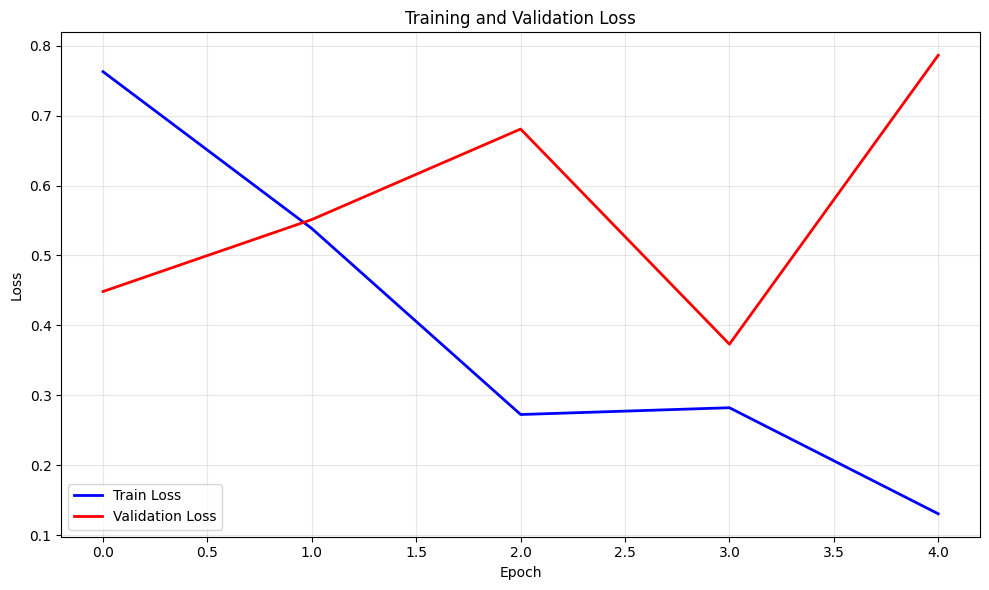

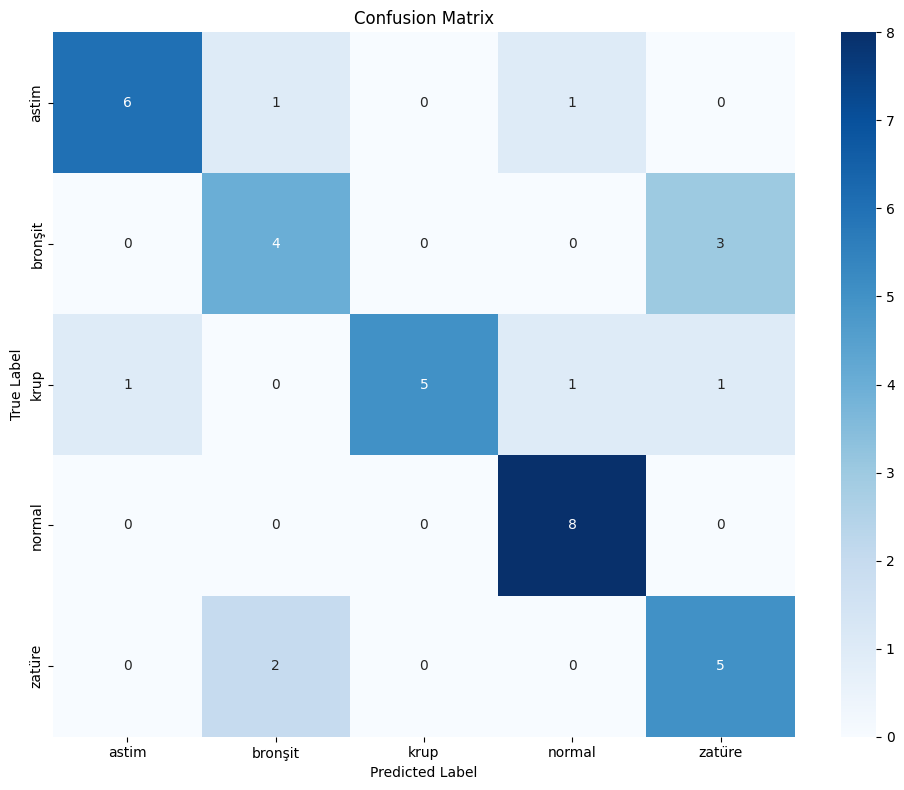

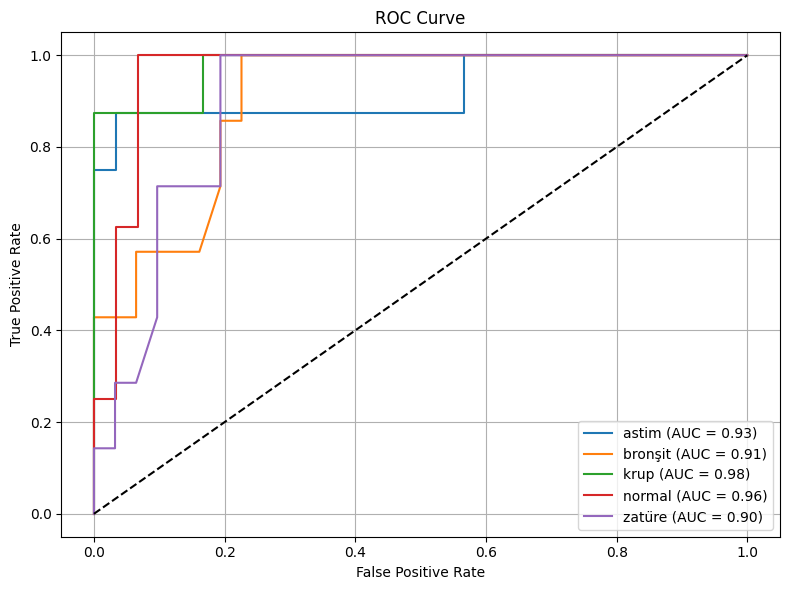

In [2]:
# =========================
# AST Audio Classification - Google Colab (RAM Friendly)
# =========================

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import ASTFeatureExtractor, ASTForAudioClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_fscore_support, accuracy_score
from sklearn.preprocessing import label_binarize
import torchaudio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from google.colab import drive, files
import time
import json
import sys
import gc

# Show RAM usage
!cat /proc/meminfo | head -20

print("Python version:", sys.version)
print("Torch version:", torch.__version__)

# Optional code for truncating long audio files:
# def truncate_wav(wav, sr, max_sec=5):
#     max_len = int(sr * max_sec)
#     if wav.shape[-1] > max_len:
#         wav = wav[..., :max_len]
#     return wav

# 2. Google Drive Connection
def mount_google_drive():
    try:
        drive.mount('/content/drive')
        print("Google Drive connected successfully!")
        return True
    except Exception as e:
        print(f"Google Drive connection error: {e}")
        return False

# 3. Data Loading Functions
def load_data(data_dir, class_names):
    data_paths = []
    labels = []
    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.exists(class_dir):
            for file_name in os.listdir(class_dir):
                if file_name.endswith('.wav'):
                    file_path = os.path.join(class_dir, file_name)
                    data_paths.append(file_path)
                    labels.append(class_idx)
    return data_paths, labels

# 4. Dataset Class
class AudioWavDataset(Dataset):
    def __init__(self, data_paths, labels):
        self.data_paths = data_paths
        self.labels = labels
    def __len__(self):
        return len(self.data_paths)
    def __getitem__(self, idx):
        wav, sr = torchaudio.load(self.data_paths[idx])
        wav = wav.mean(dim=0)  # mono
        # wav = truncate_wav(wav, sr, max_sec=5)  # Uncomment to truncate long audio files
        label = self.labels[idx]
        return wav, label

# 5. Collate Function (for AST)
def collate_fn(batch):
    wavs, labels = zip(*batch)
    wavs = [w.numpy() for w in wavs]
    inputs = feature_extractor(wavs, sampling_rate=16000, return_tensors="pt", padding=True)
    labels = torch.tensor(labels)
    return inputs, labels

# 6. Training and Evaluation Functions
def train_model(model, train_loader, val_loader, num_epochs, device, learning_rate=5e-5, patience=5):
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    best_val_acc = 0.0
    patience_counter = 0
    train_losses, val_losses = [], []
    for epoch in range(num_epochs):
        model.train()
        train_loss, train_correct, train_total = 0.0, 0, 0
        for batch in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Training'):
            inputs, labels = batch
            inputs = {k: v.to(device) for k, v in inputs.items()}
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = model(**inputs, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            _, predicted = torch.max(outputs.logits.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
        train_acc = 100 * train_correct / train_total
        avg_train_loss = train_loss / len(train_loader)
        # Validation
        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0
        with torch.no_grad():
            for batch in tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Validation'):
                inputs, labels = batch
                inputs = {k: v.to(device) for k, v in inputs.items()}
                labels = labels.to(device)
                outputs = model(**inputs, labels=labels)
                loss = outputs.loss
                val_loss += loss.item()
                _, predicted = torch.max(outputs.logits.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        val_acc = 100 * val_correct / val_total
        avg_val_loss = val_loss / len(val_loader)
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        print(f'Epoch {epoch+1}/{num_epochs}: Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {avg_val_loss:.4f}, Val Acc: {val_acc:.2f}%')
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            patience_counter = 0
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'val_acc': val_acc,
                'class_names': class_names,
                'config': config
            }, 'best_ast_model.pth')
            print(f'  New best model saved! (Val Acc: {val_acc:.2f}%)')
        else:
            patience_counter += 1
        # Memory cleanup
        gc.collect()
        torch.cuda.empty_cache()
        if patience_counter >= patience:
            print(f'Early stopping! No improvement for {patience} epochs.')
            break
    return train_losses, val_losses

def evaluate_model(model, test_loader, device, class_names, return_probs=False):
    model.eval()
    all_predictions, all_labels, all_probs = [], [], []
    with torch.no_grad():
        for batch in tqdm(test_loader, desc='Testing'):
            inputs, labels = batch
            inputs = {k: v.to(device) for k, v in inputs.items()}
            labels = labels.to(device)
            outputs = model(**inputs)
            probs = torch.softmax(outputs.logits, dim=1)
            _, predicted = torch.max(probs.data, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
    # Metrics
    print("\nClassification Report:")
    print(classification_report(all_labels, all_predictions, target_names=class_names, digits=4))
    acc = accuracy_score(all_labels, all_predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_predictions, average='macro')
    cm = confusion_matrix(all_labels, all_predictions)
    sensitivity = recall  # Sensitivity (Recall)
    specificity = np.mean([cm[i,i]/(cm[:,i].sum() if cm[:,i].sum()>0 else 1) for i in range(len(class_names))])
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1-Score: {f1:.4f}")
    # ROC and AUC
    y_true_bin = label_binarize(all_labels, classes=list(range(len(class_names))))
    auc = roc_auc_score(y_true_bin, np.array(all_probs), average='macro', multi_class='ovr')
    print(f"AUC: {auc:.4f}")
    # Confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png')
    # plt.show()
    # ROC curves
    plt.figure(figsize=(8, 6))
    for i in range(len(class_names)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], np.array(all_probs)[:, i])
        plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc_score(y_true_bin[:, i], np.array(all_probs)[:, i]):.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('roc_curve.png')
    # plt.show()
    if return_probs:
        return all_predictions, all_labels, all_probs
    else:
        return all_predictions, all_labels

def plot_training_history(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Train Loss', color='blue', linewidth=2)
    plt.plot(val_losses, label='Validation Loss', color='red', linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('training_history.png')
    # plt.show()

# 7. Main Pipeline
print("=== AST AUDIO CLASSIFICATION TRAINING ===")
print("Loading data from Google Drive...")
if not mount_google_drive():
    raise RuntimeError("Could not connect to Google Drive!")

# Try different possible paths for the training data
possible_paths = [
    '/content/drive/MyDrive/MakineOgrenmesiProjesi/Veri_Kumesi',
    '/content/drive/MyDrive/Egitim_Verileri',
    '/content/drive/MyDrive/Training_Data',
    '/content/drive/MyDrive/Data/Egitim_Verileri'
]

drive_data_path = None
for path in possible_paths:
    if os.path.exists(path):
        drive_data_path = path
        print(f"Data found in Drive: {drive_data_path}")
        break

if drive_data_path is None:
    print("Available directories in Drive:")
    drive_root = '/content/drive/MyDrive'
    if os.path.exists(drive_root):
        for item in os.listdir(drive_root):
            item_path = os.path.join(drive_root, item)
            if os.path.isdir(item_path):
                print(f"  {item}/")
                # Check subdirectories
                try:
                    for subitem in os.listdir(item_path):
                        subitem_path = os.path.join(item_path, subitem)
                        if os.path.isdir(subitem_path):
                            print(f"    {item}/{subitem}/")
                except:
                    pass
    raise RuntimeError("Could not find 'Egitim_Verileri' folder in Google Drive!")

# Copy data to local directory
os.system(f'cp -r "{drive_data_path}" ./data')
print("Data copied successfully!")

print("Does data directory exist?", os.path.exists('data'))
if os.path.exists('data'):
    print("Subdirectories:", os.listdir('data'))
    for d in os.listdir('data'):
        print(d, ":", os.listdir(os.path.join('data', d)))

# --- AUTOMATIC CLASS NAME DETECTION ---
class_names = sorted([d for d in os.listdir('data') if os.path.isdir(os.path.join('data', d))])
print("Classes found:", class_names)

# Training parameters
config = {
    'batch_size': 2,  # RAM friendly
    'num_epochs': 5,
    'learning_rate': 5e-5,
    'random_seed': 42,
    'early_stopping_patience': 5
}

# Feature extractor and model
feature_extractor = ASTFeatureExtractor.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")
model = ASTForAudioClassification.from_pretrained(
    "MIT/ast-finetuned-audioset-10-10-0.4593",
    num_labels=len(class_names),
    ignore_mismatched_sizes=True
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Device used: {device}')
model.to(device)

torch.manual_seed(config['random_seed'])
np.random.seed(config['random_seed'])

print("Loading data...")
data_paths, labels = load_data('data', class_names)
print("Total data count:", len(data_paths))

if len(data_paths) == 0:
    print("Error: No data found in data directory!")
    print("Expected directory structure:")
    for class_name in class_names:
        print(f"  data/{class_name}/*.wav")
    raise RuntimeError("No data found!")
else:
    print(f"Total {len(data_paths)} samples loaded")
    for i, class_name in enumerate(class_names):
        count = labels.count(i)
        print(f"  {class_name}: {count} samples")
    train_paths, temp_paths, train_labels, temp_labels = train_test_split(
        data_paths, labels, test_size=0.3, random_state=config['random_seed'], stratify=labels
    )
    val_paths, test_paths, val_labels, test_labels = train_test_split(
        temp_paths, temp_labels, test_size=0.5, random_state=config['random_seed'], stratify=temp_labels
    )
    print(f"Train: {len(train_paths)}, Val: {len(val_paths)}, Test: {len(test_paths)}")
    train_dataset = AudioWavDataset(train_paths, train_labels)
    val_dataset = AudioWavDataset(val_paths, val_labels)
    test_dataset = AudioWavDataset(test_paths, test_labels)
    train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True, collate_fn=collate_fn, num_workers=0)
    val_loader = DataLoader(val_dataset, batch_size=config['batch_size'], shuffle=False, collate_fn=collate_fn, num_workers=0)
    test_loader = DataLoader(test_dataset, batch_size=config['batch_size'], shuffle=False, collate_fn=collate_fn, num_workers=0)
    print("\nCreating model...")
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Total parameters: {total_params:,}")
    print(f"Trainable parameters: {trainable_params:,}")

    # Training time measurement
    train_start = time.time()
    train_losses, val_losses = train_model(
        model, train_loader, val_loader,
        config['num_epochs'], device,
        config['learning_rate'],
        config['early_stopping_patience']
    )
    train_end = time.time()
    print(f"\nTraining time: {(train_end-train_start)/60:.2f} minutes")

    # Training and validation metrics (last epoch)
    print("\n--- Final Training Metrics ---")
    print(f"Final Train Loss: {train_losses[-1]:.4f}")
    print(f"Final Validation Loss: {val_losses[-1]:.4f}")

    # Training and validation loss graph
    plot_training_history(train_losses, val_losses)

    # Test time and advanced metrics
    print("\nLoading best model and testing...")
    checkpoint = torch.load('best_ast_model.pth', map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    inference_start = time.time()
    predictions, true_labels, y_probs = evaluate_model(model, test_loader, device, class_names, return_probs=True)
    inference_end = time.time()
    print(f"Test/Inference time: {(inference_end-inference_start):.2f} seconds")

    # Save results
    results = {
        'best_val_acc': checkpoint['val_acc'],
        'best_epoch': checkpoint['epoch'],
        'class_names': class_names,
        'config': config,
        'test_predictions': predictions,
        'test_labels': true_labels
    }
    with open('training_results.json', 'w', encoding='utf-8') as f:
        json.dump(results, f, indent=2, ensure_ascii=False)
    print(f"\nTraining completed!")
    print(f"Best validation accuracy: {checkpoint['val_acc']:.2f}%")
    print(f"Best epoch: {checkpoint['epoch']}")
    print("\nDownloading trained model and results...")
    if os.path.exists('best_ast_model.pth'):
        files.download('best_ast_model.pth')
        print("Model file downloaded: best_ast_model.pth")
    if os.path.exists('training_results.json'):
        files.download('training_results.json')
        print("Results downloaded: training_results.json")
    if os.path.exists('training_history.png'):
        files.download('training_history.png')
        print("Training graph downloaded: training_history.png")
    if os.path.exists('confusion_matrix.png'):
        files.download('confusion_matrix.png')
        print("Confusion matrix downloaded: confusion_matrix.png")
    if os.path.exists('roc_curve.png'):
        files.download('roc_curve.png')
        print("ROC curve downloaded: roc_curve.png")
    print("\nAll files downloaded successfully!")
    print("\nTo use the model:")
    print("1. Download best_ast_model.pth file to your computer")
    print("2. Use test_model.py script to test new audio files")